<a href="https://colab.research.google.com/github/godsesaurab/data-science-projects/blob/main/6.%20Time%20Series%20Analysis%20%26%20Visualization%20/Time%20Series%20Analysis%20%26%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis & Visualization

**Time series data** consists of sequential data points recorded over time which is used in industries like finance, pharmaceuticals, social media and research. Analyzing and visualizing this data helps us to find trends and seasonal patterns for forecasting and decision-making.

## Time Series Data Analysis
Time series data analysis involves studying data points collected in chronological time order to identify current trends, patterns and other behaviors. This helps extract actionable insights and supports accurate forecasting and decision-making.

## Key Concepts in Time Series Analysis

* Trend: It represents the general direction in which a time series is moving over an extended period. It checks whether the values are increasing, decreasing or staying relatively constant.

* Seasonality: Seasonality refers to repetitive patterns or cycles that occur at regular intervals within a time series corresponding to specific time units like days, weeks, months or seasons.

* Moving average: It is used to smooth out short-term fluctuations and highlight longer-term trends or patterns in the data.

* Noise: It represents the irregular and unpredictable components in a time series that do not follow a pattern.

* Differencing: It is used to make the difference in values of a specified interval. By default it’s 1 but we can specify different values for plots.

* Stationarity: A stationary time series is statistical properties such as mean, variance and autocorrelation remain constant over time.

* Order: The order of differencing refers to the number of times the time series data needs to be differenced to achieve stationarity.

* Autocorrelation: Autocorrelation is a statistical method used in time series analysis to quantify the degree of similarity between a time series and a lagged version of itself.

* Resampling: Resampling is a technique in time series analysis that is used for changing the frequency of the data observations.










## Types of Time Series Data

* Continuous Time Series: Data recorded at regular intervals with a continuous range of values like temperature, stock prices, Sensor Data, etc.

* Discrete Time Series: Data with distinct values or categories recorded at specific time points like counts of events, categorical statuses, etc.


## Visualization Approaches

* Use line plots or area charts for continuous data to highlight trends and fluctuations.

* Use bar charts or histograms for discrete data to show frequency or distribution across categories.

### 1. Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

### 2. Loading Dataset

In [3]:
df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20250122170223461909/stock_data.csv',
                 parse_dates=True,
                 index_col="Date")

df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


### Data Cleaning

In [4]:
df.drop(columns='Unnamed: 0', inplace =True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


### 4. Plotting High Stock Prices

Since the **volume** column is of continuous data type we will use **line graph** to visualize it.

* **sns.lineplot(data=df, x=df.index, y='High', label='High Price', color='blue')** : plots high prices over time using the datetime index on x-axis


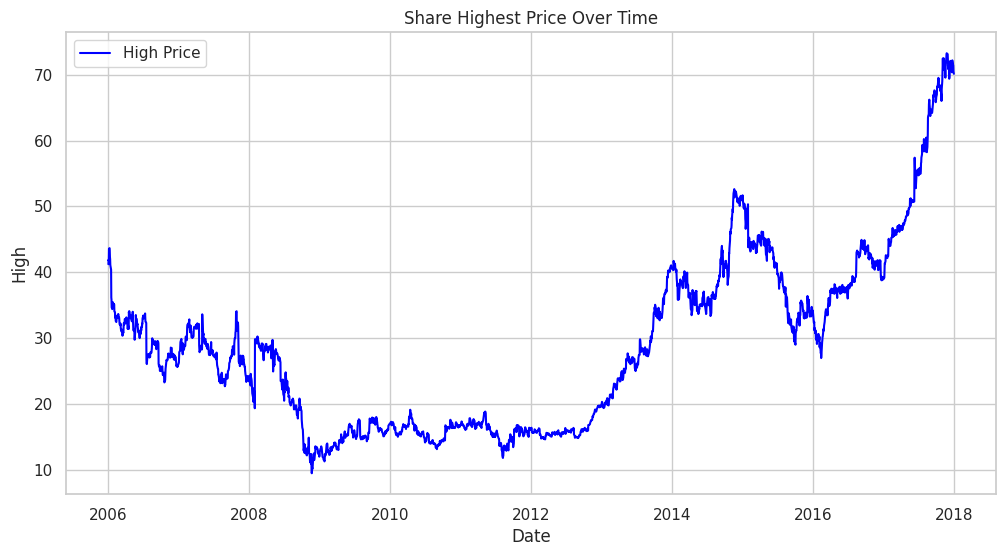

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='High', label='High Price',
             color='blue')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

### 5. Resampling Data

To better understand the trend of the data we will use the **resampling method** which provide a clearer view of trends and patterns when we are dealing with daily data.

* **df_resampled = df.resample('M').mean(numeric_only=True)**: Resamples data to monthly frequency and calculates the mean of all numeric columns for each month.

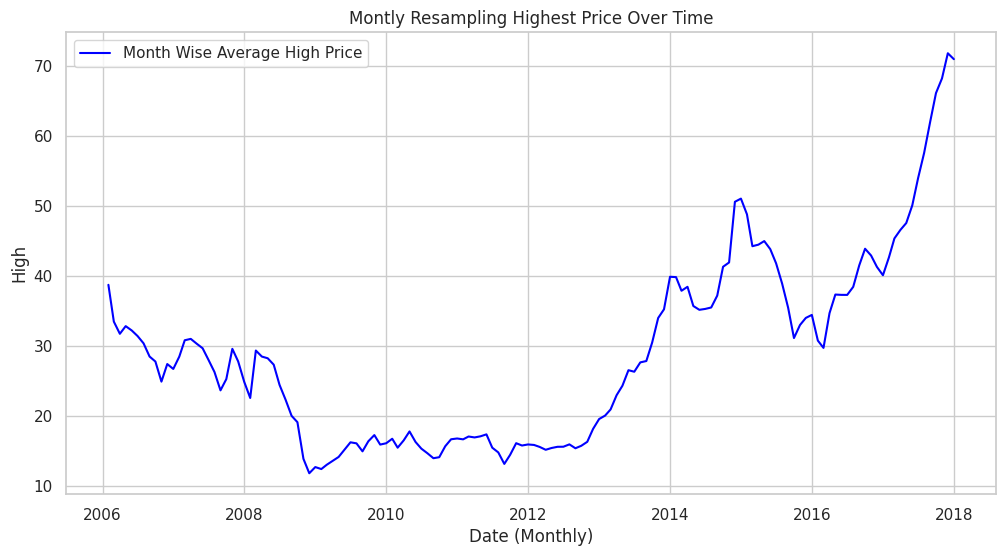

In [10]:
df_resampled = df.resample('ME').mean(numeric_only=True)

sns.set(style='whitegrid')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_resampled,
             x=df_resampled.index, y='High',
             label='Month Wise Average High Price',
             color='blue')
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Montly Resampling Highest Price Over Time')

plt.show()